In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import statsmodels.api as sm
import statsmodels.stats.contingency_tables as tables
import statsmodels.stats.api as sms
import statsmodels.stats as stats

In [13]:
hbat = pd.read_excel('dataset/hbat_200.xlsx', encoding='utf-8')
hbat.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,2,0,1,1,1,8.5,3.9,2.5,5.9,...,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,1
1,2,3,1,0,0,0,8.2,2.7,5.1,7.2,...,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,0
2,3,3,0,1,1,1,9.2,3.4,5.6,5.6,...,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,1
3,4,1,1,1,1,0,6.4,3.3,7.0,3.7,...,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,0
4,5,2,0,1,0,1,9.0,3.4,5.2,4.6,...,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,0


In [14]:
hbat['X1'] = hbat['X1'] - 1

In [31]:
X = hbat[['X1','X5','X7','X10','X15']]
X.rename(columns={'X1':'Customer_Type',
                  'X5':'Distribution_System',
                  'X7':'E-Commerce',
                  'X10':'Advertising',
                  'X15':'New_Products' }, inplace=True)

X = sm.add_constant(X)
y = hbat[['X23']]

# Data Warehouse Classification Variables
# X1 : Customer Type Non-metric
# X5 : Distribution System Non-metric

# Performance Perceptions Variables
# X7 E-Commerce Activities/Website metric
# X10 Advertising metric
# X15 New Products metric

model = sm.Logit(y, X).fit()
# model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# predictions = model.predict(X) # make the predictions by the model
model.summary()

Optimization terminated successfully.
         Current function value: 0.460802
         Iterations 6


C:\Users\Rocku\Anaconda64\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    X23   No. Observations:                  200
Model:                          Logit   Df Residuals:                      194
Method:                           MLE   Df Model:                            5
Date:                Wed, 25 Oct 2017   Pseudo R-squ.:                  0.3256
Time:                        16:51:07   Log-Likelihood:                -92.160
converged:                       True   LL-Null:                       -136.66
                                        LLR p-value:                 1.087e-17
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -6.7013      1.352     -4.956      0.000      -9.351      -4.051
Customer_Type           1.6538      0.276      6.001      0.000       1.114       2.194
Distribution_System     0.9396      0.371      2.530      0.011       0.212       1.667
E-Commerce              1.1089      0.316      3.507      0.000       0.489       1.729
Advertising            -0.0601      0.186     -0.324      0.746      -0.424       0.304
New_Products            0.0493      0.130      0.378      0.705      -0.206       0.305
=======================================================================================
"""

In [16]:
model.deviance/1model.

0.92623505459343236

In [32]:
model.aic

196.32077586409301

In [18]:
1-(92.160/136.66)

0.3256256402751354

In [19]:
parameter = np.exp(model.params)
ci = np.exp(model.conf_int())

In [20]:
ci['coef'] = parameter
ci

,0,1,coef
const,0.000087,0.017401,0.001229
Customer_Type,3.045628,8.970346,5.226886
Distribution_System,1.235790,5.298648,2.558909
E-Commerce,1.630846,5.633508,3.031070
Advertising,0.654441,1.355036,0.941696
New_Products,0.813732,1.356330,1.050566


In [21]:
model.llf * -2

184.32077586409298

In [22]:
pred = model.predict(X)

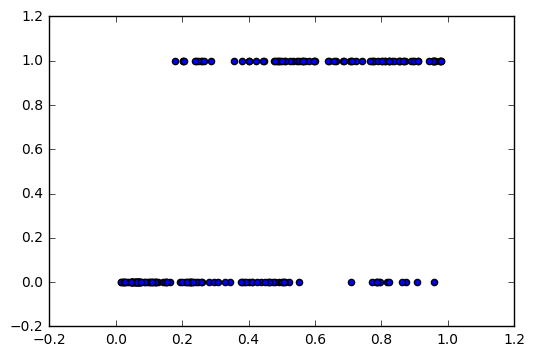

In [23]:
plt.hold()
plt.scatter(pred, y)

In [33]:
X = hbat[['X1','X5','X7','X10','X15','X17']]
X.rename(columns={'X1':'Customer_Type',
                  'X5':'Distribution_System',
                  'X7':'E-Commerce',
                  'X10':'Advertising',
                  'X15':'New_Products',
                  'X17': 'Price_Flexibility'}, inplace=True)

X = sm.add_constant(X)
y = hbat[['X23']]
# Data Warehouse Classification Variables
# X1 : Customer Type Non-metric
# X5 : Distribution System Non-metric

# Performance Perceptions Variables
# X7 E-Commerce Activities/Website metric
# X10 Advertising metric
# X15 New Products metric

# model = sm.Logit(y, X).fit()
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# predictions = model.predict(X) # make the predictions by the model
model.summary()

C:\Users\Rocku\Anaconda64\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    X23   No. Observations:                  200
Model:                            GLM   Df Residuals:                      193
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -86.789
Date:                Wed, 25 Oct 2017   Deviance:                       173.58
Time:                        16:51:19   Pearson chi2:                     182.
No. Iterations:                     6                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -9.1187      1.715     -5.318      0.000     -12.480      -5.758
Customer_Type           1.8995      0.313      6.067      0.000       1.286       2.513
Distribution_System     1.4603      0.426      3.426      0.001       0.625       2.296
E-Commerce              1.0579      0.333      3.175      0.001       0.405       1.711
Advertising            -0.1970      0.195     -1.008      0.314      -0.580       0.186
New_Products            0.0384      0.135      0.285      0.776      -0.226       0.303
Price_Flexibility       0.5804      0.185      3.136      0.002       0.218       0.943
=======================================================================================
"""

In [34]:
model.aic

187.57815420694999

In [26]:
parameter = np.exp(model.params)
ci = np.exp(model.conf_int())

In [27]:
ci['coef'] = parameter
ci

,0,1,coef
const,0.000004,0.003158,0.000110
Customer_Type,3.617699,12.344453,6.682703
Distribution_System,1.867938,9.931613,4.307161
E-Commerce,1.498975,5.534338,2.880249
Advertising,0.559812,1.204646,0.821203
New_Products,0.797750,1.353678,1.039181
Price_Flexibility,1.243151,2.568075,1.786758


In [28]:
model.llf * -2

173.57815420694999

In [35]:
model.deviance/model.df_resid

0.89936867464740922

In [30]:
model.df_resid

193